🌟  Diabetes Prediction Dashboard
Dataset shape: (768, 9)
Outcome
0    500
1    268
Name: count, dtype: int64


/tmp/ipython-input-796074.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Outcome', y='Glucose', palette=accent_colors[:2], alpha=0.8)
/tmp/ipython-input-796074.py:44: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df, x='BMI', hue='Outcome', palette=accent_colors[2:],
/tmp/ipython-input-796074.py:49: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette=accent_colors, alpha=0.7, s=60)
/tmp/ipython-input-796074.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipython-input-796074.py:57: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Dej

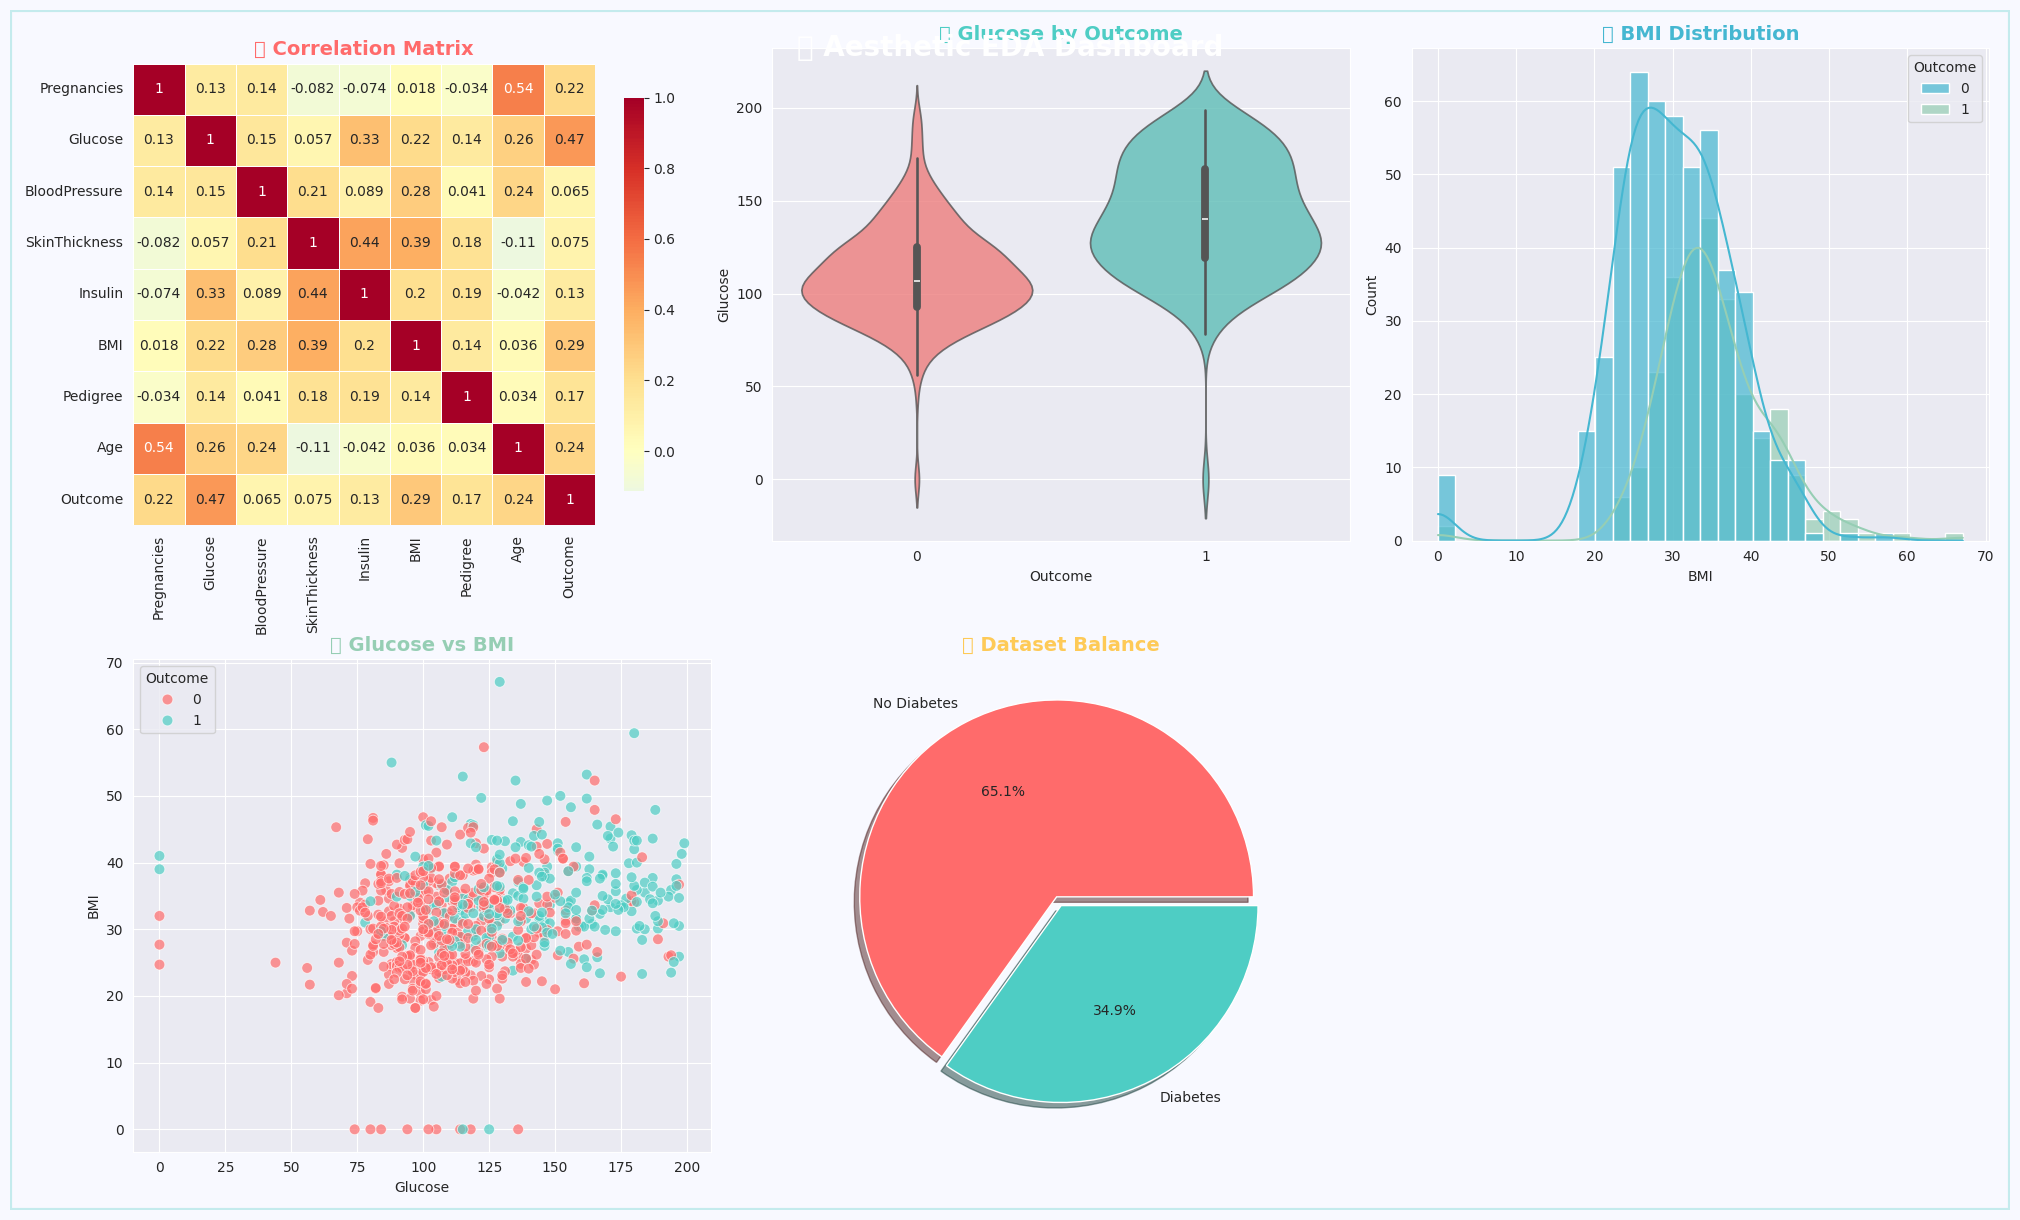


 Model Results
 Accuracy: 72.08%

 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



/tmp/ipython-input-796074.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf.feature_importances_, y=X.columns, palette='viridis', alpha=0.9, edgecolor='white', linewidth=1)
/tmp/ipython-input-796074.py:78: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


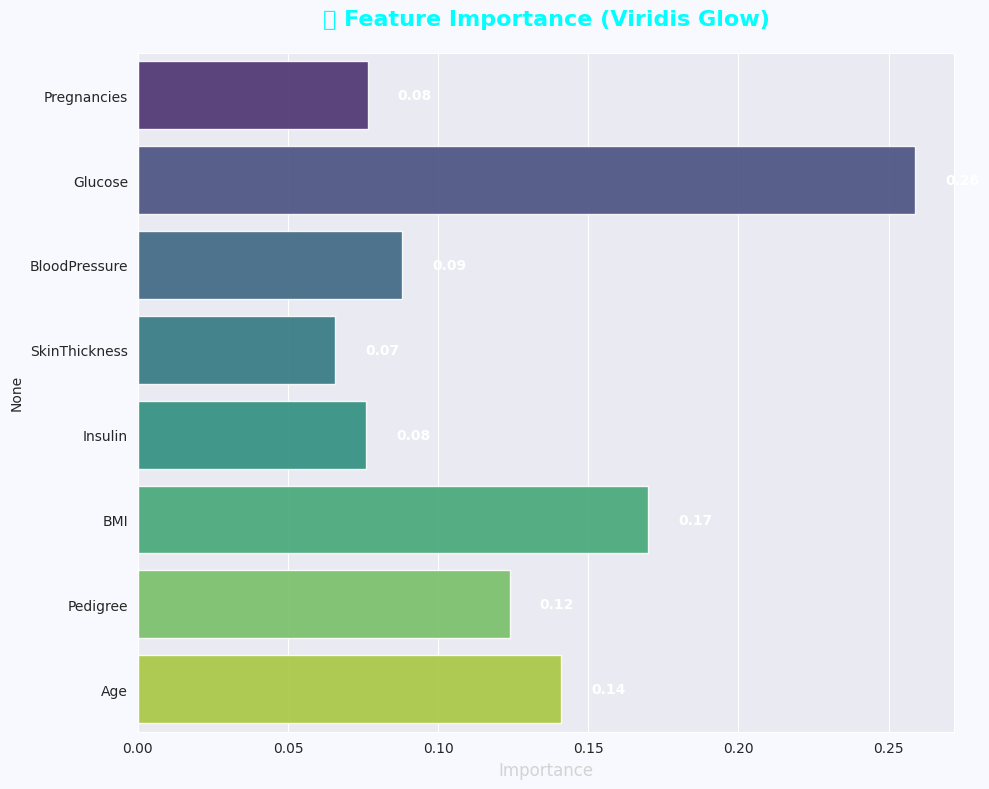

/tmp/ipython-input-796074.py:87: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


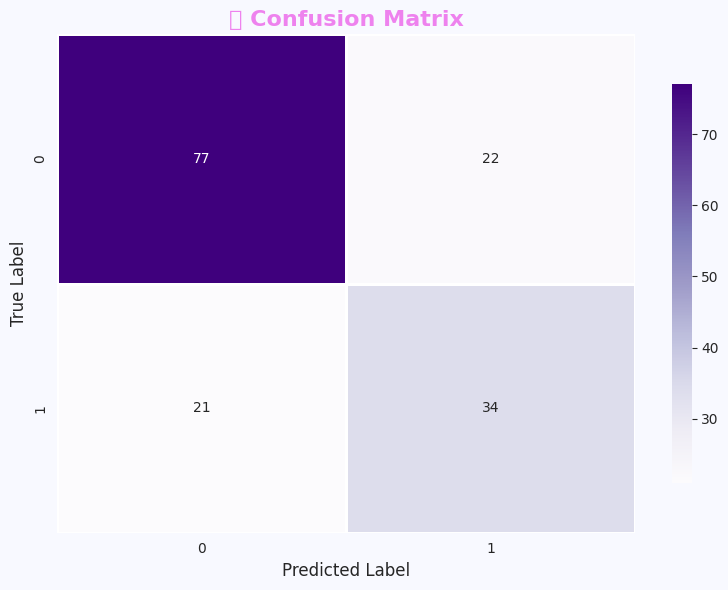

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.patches import Rectangle
plt.style.use('dark_background')
sns.set_palette("husl")
sns.set_style("darkgrid" if plt.rcParams['figure.facecolor'] == 'black' else "whitegrid")
bg_color = '#0f0f23' if plt.rcParams['figure.facecolor'] == 'black' else '#f8f9ff'
accent_colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57']

print("🌟  Diabetes Prediction Dashboard")
print("=" * 50)

# Load data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'Pedigree', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

print(f"Dataset shape: {df.shape}")
print(df['Outcome'].value_counts())

fig = plt.figure(figsize=(20, 12), facecolor=bg_color)
ax_bg = fig.add_axes([0,0,1,1])
ax_bg.set_xlim(0,1)
ax_bg.set_ylim(0,1)
ax_bg.axis('off')
rect = Rectangle((0,0), 1, 1, transform=ax_bg.transAxes, facecolor='none',
                 edgecolor=accent_colors[1], linewidth=3, alpha=0.3)
ax_bg.add_patch(rect)
ax1 = fig.add_subplot(2, 3, 1)
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu_r', center=0, square=True,
            linewidths=0.5, cbar_kws={'shrink': 0.8})
ax1.set_title('🔥 Correlation Matrix', fontsize=14, fontweight='bold', color=accent_colors[0])

ax2 = fig.add_subplot(2, 3, 2)
sns.violinplot(data=df, x='Outcome', y='Glucose', palette=accent_colors[:2], alpha=0.8)
ax2.set_title('🎻 Glucose by Outcome', fontsize=14, fontweight='bold', color=accent_colors[1])
ax3 = fig.add_subplot(2, 3, 3)
sns.histplot(data=df, x='BMI', hue='Outcome', palette=accent_colors[2:],
             kde=True, alpha=0.7, bins=30)
ax3.set_title('📈 BMI Distribution', fontsize=14, fontweight='bold', color=accent_colors[2])

ax4 = fig.add_subplot(2, 3, 4)
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette=accent_colors, alpha=0.7, s=60)
ax4.set_title('💎 Glucose vs BMI', fontsize=14, fontweight='bold', color=accent_colors[3])
ax5 = fig.add_subplot(2, 3, 5)
outcome_counts = df['Outcome'].value_counts()
plt.pie(outcome_counts.values, labels=['No Diabetes', 'Diabetes'], colors=accent_colors[:2],
        autopct='%1.1f%%', explode=(0.05, 0), shadow=True)
ax5.set_title('🍰 Dataset Balance', fontsize=14, fontweight='bold', color=accent_colors[4])

plt.tight_layout()
plt.suptitle('🌈 Aesthetic EDA Dashboard', fontsize=20, fontweight='bold', y=0.98, color='white')
plt.show()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("\n Model Results")
print(f" Accuracy: {accuracy_score(y_test, pred):.2%}")
print("\n Classification Report:")
print(classification_report(y_test, pred))
fig, ax = plt.subplots(figsize=(10, 8), facecolor=bg_color)
sns.barplot(x=rf.feature_importances_, y=X.columns, palette='viridis', alpha=0.9, edgecolor='white', linewidth=1)
ax.set_title('🌟 Feature Importance (Viridis Glow)', fontsize=16, fontweight='bold', pad=20, color='cyan')
ax.set_xlabel('Importance', fontsize=12, color='lightgray')
for i, v in enumerate(rf.feature_importances_):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center', fontweight='bold', color='white')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6), facecolor=bg_color)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar_kws={'shrink': 0.8},
            linewidths=2, linecolor='white')
plt.title('🎯 Confusion Matrix', fontsize=16, fontweight='bold', color='violet')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()
